# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


In [0]:
# Importing Libraries

In [0]:
import pandas as pd
import numpy as np

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [0]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [11]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [13]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [18]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


<h2>Defining the Architecture of LSTM - Single Layer LSTM</h2>

In [0]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(128, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               70656     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 390       
Total params: 79,302
Trainable params: 79,302
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# Training the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=20)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 61s 8ms/step - loss: 1.4205 - acc: 0.3565 - val_loss: 1.2105 - val_acc: 0.4479
Epoch 2/20
7352/7352 [==============================] - 57s 8ms/step - loss: 1.0360 - acc: 0.5301 - val_loss: 0.7840 - val_acc: 0.6284
Epoch 3/20
7352/7352 [==============================] - 57s 8ms/step - loss: 0.9341 - acc: 0.5605 - val_loss: 1.3459 - val_acc: 0.4228
Epoch 4/20
7352/7352 [==============================] - 57s 8ms/step - loss: 0.7310 - acc: 0.6390 - val_loss: 0.6863 - val_acc: 0.6162
Epoch 5/20
7352/7352 [==============================] - 57s 8ms/step - loss: 0.5851 - acc: 0.7303 - val_loss: 0.5019 - val_acc: 0.8015
Epoch 6/20
7352/7352 [==============================] - 57s 8ms/step - loss: 0.3603 - acc: 0.8609 - val_loss: 0.3263 - val_acc: 0.8846
Epoch 7/20
7352/7352 [==============================] - 57s 8ms/step - loss: 0.2237 - acc: 0.9199 - val_loss: 0.3544 - val_acc: 0.8968
Epoch 8

In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      380  ...                   0                 0
STANDING                 0       88  ...                   0                 0
WALKING                  0        0  ...                  27                 0
WALKING_DOWNSTAIRS       0        0  ...                 418                 1
WALKING_UPSTAIRS         0        0  ...                  10               458

[6 rows x 6 columns]


In [0]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 3s 921us/step


In [0]:
score

[0.24497356653394584, 0.9182219205972175]

- With a simple 2 layer architecture we got 91.82% accuracy and a loss of 0.22
- We can further imporve the performace with Hyperparameter tuning

<h2>Architecture of LSTM - Multi Layer LSTM<h2>

In [0]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(80, return_sequences = True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.25))
model.add(LSTM(80)) 
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 80)           28800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 486       
Total params: 80,806
Trainable params: 80,806
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=64,
          validation_data=(X_test, Y_test),
          epochs=30)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 42s 6ms/step - loss: 1.1575 - acc: 0.5249 - val_loss: 1.2458 - val_acc: 0.4978
Epoch 2/30
7352/7352 [==============================] - 40s 5ms/step - loss: 0.8146 - acc: 0.6601 - val_loss: 0.9396 - val_acc: 0.6016
Epoch 3/30
7352/7352 [==============================] - 40s 5ms/step - loss: 0.6309 - acc: 0.7291 - val_loss: 0.8074 - val_acc: 0.6929
Epoch 4/30
7352/7352 [==============================] - 40s 5ms/step - loss: 0.5919 - acc: 0.7499 - val_loss: 0.6117 - val_acc: 0.7374
Epoch 5/30
7352/7352 [==============================] - 40s 5ms/step - loss: 0.5148 - acc: 0.7897 - val_loss: 0.6260 - val_acc: 0.7560
Epoch 6/30
7352/7352 [==============================] - 40s 5ms/step - loss: 0.4372 - acc: 0.8308 - val_loss: 0.4171 - val_acc: 0.8456
Epoch 7/30
7352/7352 [==============================] - 40s 5ms/step - loss: 0.3181 - acc: 0.8794 - val_loss: 0.4013 - val_acc: 0.8616
Epoch 8

In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  3      413  ...                   0                 1
STANDING                 0       64  ...                   0                 0
WALKING                  0        0  ...                  26                 3
WALKING_DOWNSTAIRS       0        0  ...                 404                 3
WALKING_UPSTAIRS         0        1  ...                   3               416

[6 rows x 6 columns]


In [0]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 4s 1ms/step


In [0]:
score

[0.3956586769653622, 0.9175432643366135]

- With 2 LSTM layers with 80 units, dropout of 0.25 and a 2 Dense layers we get a 91.04 % accuracy.
- In some epochs, the accuracy also goes upto 93%.
- Tried different LSTM layers with different units, different number of dense layers but the accuracy remains in the range of 90-92%.

<h2>Divide and Conquer based CNN</h2>

This is the code for the Sensors 2018 paper Divide and Conquer-based 1D CNN Human Activity Recognition Using Test Data Sharpening by Heeryon Cho and Sang Min Yoon.
- This approach leverages a two-stage learning of multiple 1D CNN models.
- We ﬁrst build a binary classiﬁer for recognizing abstract activities i.e static or dynamic.
- Then build two multi-class 1D CNN models for recognizing individual activities. 

In [0]:
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [0]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))


def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    y [y <= 3] = 0
    y [y > 3] = 1

    return pd.get_dummies(y).as_matrix()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma

In [0]:
# Loading the train and test data
X_train_, X_test_, Y_train_, Y_test_ = load_data()

In [22]:
print(Y_train_.shape)
print(Y_test_.shape)

(7352, 2)
(2947, 2)


- Binary classifier to recognize activities as static and dynamic

In [75]:
model_ = Sequential()
model_.add(Conv1D(filters=64, kernel_size=3, activation='relu',input_shape=(128,9)))
model_.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_.add(Dropout(0.5))
model_.add(MaxPooling1D(pool_size=2))
model_.add(Flatten())
model_.add(Dense(32, activation='relu'))
model_.add(Dense(2, activation='softmax'))
model_.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 126, 64)           1792      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 124, 32)           6176      
_________________________________________________________________
dropout_4 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                63520     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

In [0]:
# Compiling the model
model_.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [77]:
# Training the model
model_.fit(X_train_,
          Y_train_,
          batch_size=128,
          validation_data=(X_test_, Y_test_),
          epochs=20)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 5s 624us/step - loss: 0.0848 - acc: 0.9653 - val_loss: 0.0164 - val_acc: 0.9952
Epoch 2/20
7352/7352 [==============================] - 4s 514us/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0116 - val_acc: 0.9973
Epoch 3/20
7352/7352 [==============================] - 4s 517us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0123 - val_acc: 0.9969
Epoch 4/20
7352/7352 [==============================] - 4s 515us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.0118 - val_acc: 0.9959
Epoch 5/20
7352/7352 [==============================] - 4s 514us/step - loss: 5.4784e-04 - acc: 0.9999 - val_loss: 0.0083 - val_acc: 0.9973
Epoch 6/20
7352/7352 [==============================] - 4s 521us/step - loss: 4.2276e-04 - acc: 0.9999 - val_loss: 0.0075 - val_acc: 0.9976
Epoch 7/20
7352/7352 [==============================] - 4s 523us/step - loss: 1.9288e-04 - acc: 1.0000 - val_loss: 0.0082 - val_

In [78]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model_.evaluate(X_test_, Y_test_, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
2947/2947 [==============================] - 0s 120us/step
test loss, test acc: [0.007921562593161397, 0.997624703087886]


- Multi-class 1D CNN model for recognizing static activities

In [0]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))


def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    static = y > 3
    y  = y[static]

    return pd.get_dummies(y).as_matrix(), static

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_tr = load_y('train')
    y_test, y_te = load_y('test')
    X_train = X_train[y_tr]
    X_test = X_test[y_te]

    return X_train, X_test, y_train, y_test

In [0]:
# Loading the train and test data
X_train_static, X_test_static, Y_train_static, Y_test_static = load_data()

In [81]:
print(X_train_static.shape)
print(X_test_static.shape)

print(Y_train_static.shape)
print(Y_test_static.shape)

(4067, 128, 9)
(1560, 128, 9)
(4067, 3)
(1560, 3)


In [147]:
model_static = Sequential()
model_static.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(128,9)))
model_static.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model_static.add(Dropout(0.45))
model_static.add(MaxPooling1D(pool_size=2))
model_static.add(Flatten())
model_static.add(Dense(64, activation='relu'))
model_static.add(Dense(32, activation='relu'))
model_static.add(Dense(3, activation='softmax'))
model_static.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 124, 32)           1472      
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 122, 16)           1552      
_________________________________________________________________
dropout_14 (Dropout)         (None, 122, 16)           0         
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 61, 16)            0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 976)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                62528     
_________________________________________________________________
dense_28 (Dense)             (None, 32)              

In [0]:
# Compiling the model
model_static.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [149]:
# Training the model
model_static.fit(X_train_static,
          Y_train_static,
          batch_size=64,
          validation_data=(X_test_static, Y_test_static),
          epochs=30)

Train on 4067 samples, validate on 1560 samples
Epoch 1/30
4067/4067 [==============================] - 4s 888us/step - loss: 0.3417 - acc: 0.8522 - val_loss: 0.2840 - val_acc: 0.8750
Epoch 2/30
4067/4067 [==============================] - 1s 365us/step - loss: 0.1995 - acc: 0.9154 - val_loss: 0.2812 - val_acc: 0.8699
Epoch 3/30
4067/4067 [==============================] - 2s 375us/step - loss: 0.1981 - acc: 0.9125 - val_loss: 0.2710 - val_acc: 0.8667
Epoch 4/30
4067/4067 [==============================] - 2s 370us/step - loss: 0.1954 - acc: 0.9147 - val_loss: 0.2719 - val_acc: 0.8679
Epoch 5/30
4067/4067 [==============================] - 2s 370us/step - loss: 0.1960 - acc: 0.9174 - val_loss: 0.3353 - val_acc: 0.8346
Epoch 6/30
4067/4067 [==============================] - 1s 365us/step - loss: 0.1832 - acc: 0.9235 - val_loss: 0.2826 - val_acc: 0.8885
Epoch 7/30
4067/4067 [==============================] - 2s 369us/step - loss: 0.1754 - acc: 0.9243 - val_loss: 0.2936 - val_acc: 0.8679


In [150]:
print('\n# Evaluate on test data')
results = model_static.evaluate(X_test_static, Y_test_static, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data
1560/1560 [==============================] - 0s 121us/step
test loss, test acc: [0.3276318245113287, 0.9102564102564102]


- Multi-class 1D CNN model for recognizing dynamic activities

In [0]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))


def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    dynamic = y <= 3
    y  = y[dynamic]

    return pd.get_dummies(y).as_matrix(), dynamic

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_tr = load_y('train')
    y_test, y_te = load_y('test')
    X_train = X_train[y_tr]
    X_test = X_test[y_te]

    return X_train, X_test, y_train, y_test

In [0]:
# Loading the train and test data
X_train_dynamic, X_test_dynamic, Y_train_dynamic, Y_test_dynamic = load_data()

In [116]:
print(X_train_dynamic.shape)
print(X_test_dynamic.shape)

print(Y_train_dynamic.shape)
print(Y_test_dynamic.shape)

(3285, 128, 9)
(1387, 128, 9)
(3285, 3)
(1387, 3)


In [155]:
model_dynamic = Sequential()
model_dynamic.add(Conv1D(filters=64, kernel_size=7, activation='relu',input_shape=(128,9)))
model_dynamic.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model_dynamic.add(Dropout(0.6))
model_dynamic.add(MaxPooling1D(pool_size=5))
model_dynamic.add(Flatten())
model_dynamic.add(Dense(64, activation='relu'))
model_dynamic.add(Dense(16, activation='relu'))
model_dynamic.add(Dense(3, activation='softmax'))
model_dynamic.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 122, 64)           4096      
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 118, 32)           10272     
_________________________________________________________________
dropout_15 (Dropout)         (None, 118, 32)           0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 23, 32)            0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 736)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                47168     
_________________________________________________________________
dense_31 (Dense)             (None, 16)              

In [0]:
# Compiling the model
model_dynamic.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [157]:
# Training the model
model_dynamic.fit(X_train_dynamic,
          Y_train_dynamic,
          batch_size=32,
          validation_data=(X_test_dynamic, Y_test_dynamic),
          epochs=30)

Train on 3285 samples, validate on 1387 samples
Epoch 1/30
3285/3285 [==============================] - 5s 2ms/step - loss: 0.7302 - acc: 0.6432 - val_loss: 0.5057 - val_acc: 0.8637
Epoch 2/30
3285/3285 [==============================] - 3s 841us/step - loss: 0.1185 - acc: 0.9629 - val_loss: 0.2699 - val_acc: 0.9193
Epoch 3/30
3285/3285 [==============================] - 3s 839us/step - loss: 0.0279 - acc: 0.9924 - val_loss: 0.1931 - val_acc: 0.9308
Epoch 4/30
3285/3285 [==============================] - 3s 856us/step - loss: 0.0172 - acc: 0.9942 - val_loss: 0.1125 - val_acc: 0.9668
Epoch 5/30
3285/3285 [==============================] - 3s 830us/step - loss: 0.0070 - acc: 0.9985 - val_loss: 0.1249 - val_acc: 0.9596
Epoch 6/30
3285/3285 [==============================] - 3s 829us/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.1503 - val_acc: 0.9452
Epoch 7/30
3285/3285 [==============================] - 3s 855us/step - loss: 6.7462e-04 - acc: 1.0000 - val_loss: 0.0897 - val_acc: 0.972

In [158]:
print('\n# Evaluate on test data')
results = model_dynamic.evaluate(X_test_dynamic, Y_test_dynamic, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data
1387/1387 [==============================] - 0s 241us/step
test loss, test acc: [0.057113338884291195, 0.9841384282624369]


- Pipeline for Final predictions

In [0]:
def predict(X):
  # classify if its static or dynamic activity
  model_1 = model_.predict(X)
  pred = np.argmax(model_1, axis = 1)

  X_static = X[pred==1]
  X_dynamic = X[pred==0]

  # classify if its sitting, laying, standing
  model_2 = model_static.predict(X_static)
  pred_static = np.argmax(model_2, axis=1)

  # add 4 because the classified labels are 0,1,2 and their original labels are 4,5,6
  pred_static = pred_static + 4

  # classify if its walking, walking_upstairs, walking_downstairs
  model_3 = model_dynamic.predict(X_dynamic)
  pred_dynamic = np.argmax(model_3, axis=1)

  # add 1 because the classified labels are 0,1,2 and their original labels are 1,2,3
  pred_dynamic = pred_dynamic + 1

  i,j = 0,0 
  final_predictions = []
  for x in pred:
      if x == 1:
          final_predictions.append(pred_static[i])
          i = i + 1
      else:
          final_predictions.append(pred_dynamic[j])
          j = j + 1 
  return final_predictions

In [0]:
pred_tr = predict(X_train)
pred_te = predict(X_test)

In [0]:
# convert the one hot encoded array to a value
y_tr = np.argmax(Y_train, axis = 1)
y_tr = y_tr + 1

y_te = np.argmax(Y_test, axis = 1)
y_te = y_te + 1

In [162]:
from sklearn.metrics import accuracy_score
print('Accuracy of train data', accuracy_score(y_tr, pred_tr))
print('Accuracy of test data', accuracy_score(y_te, pred_te))

Accuracy of train data 0.9836779107725789
Accuracy of test data 0.9433322022395657


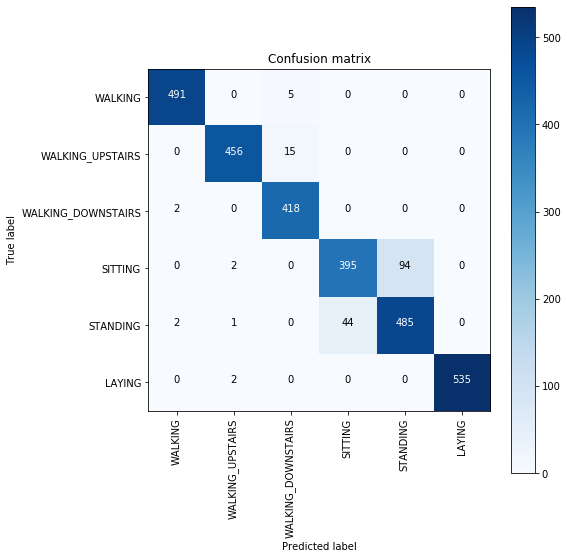

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te, pred_te)

plt.figure(figsize=(8,8))
classes = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
plot_confusion_matrix(cm, classes=classes)
plt.show()

<h2>Conclusions</h2>

In [168]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Approach", "Accuracy"]

x.add_row(["1 LSTM layer", 91.82])
x.add_row(["2 LSTM Layer", 91.75])
x.add_row(["Divide and Conquer CNN", 94.33])

print(x)

+------------------------+----------+
|        Approach        | Accuracy |
+------------------------+----------+
|      1 LSTM layer      |  91.82   |
|      2 LSTM Layer      |  91.75   |
| Divide and Conquer CNN |  94.33   |
+------------------------+----------+
